[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fyzur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Welcome to the Enhanced Burstiness Calculator!
Burstiness Prediction: 11.73%


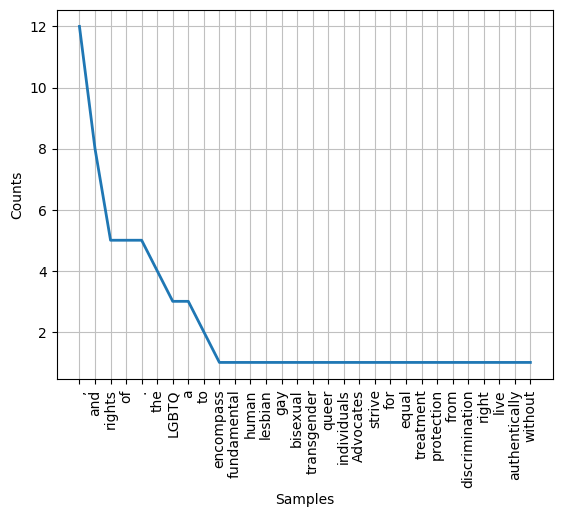

In [3]:
import nltk
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from nltk import FreqDist
import matplotlib.pyplot as plt

nltk.download('punkt')

# Neural Network Model
class BurstinessClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(BurstinessClassifier, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

def calculate_burstiness(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Calculate word frequency distribution
    word_frequency = FreqDist(words)

    # Convert word frequencies to a tensor
    word_tensor = torch.Tensor(list(word_frequency.values())).view(-1, 1)

    # Normalize word frequencies
    normalized_word_tensor = word_tensor / word_tensor.sum()

    # Train a simple neural network to predict burstiness
    input_size = 1  # One feature: word frequency
    output_size = 1  # One output: burstiness score
    model = BurstinessClassifier(input_size, output_size)

    # Define loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Train the model
    for epoch in range(1000):
        # Forward pass
        outputs = model(normalized_word_tensor)
        loss = criterion(outputs, normalized_word_tensor)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Get burstiness prediction
    burstiness_prediction = outputs.detach().numpy()[0][0]

    return burstiness_prediction, word_frequency

def plot_word_frequency_distribution(word_frequency):
    # Plot word frequency distribution
    word_frequency.plot(30, cumulative=False)
    plt.show()

def main():
    print("Welcome to the Enhanced Burstiness Calculator!")
    user_input = input("Enter the text you want to analyze: ")

    # Calculate and display burstiness, and obtain word frequency distribution
    burstiness_prediction, word_frequency = calculate_burstiness(user_input)
    print(f"Burstiness Prediction: {burstiness_prediction:.2%}")

    # Plot word frequency distribution
    plot_word_frequency_distribution(word_frequency)

if __name__ == "__main__":
    main()
